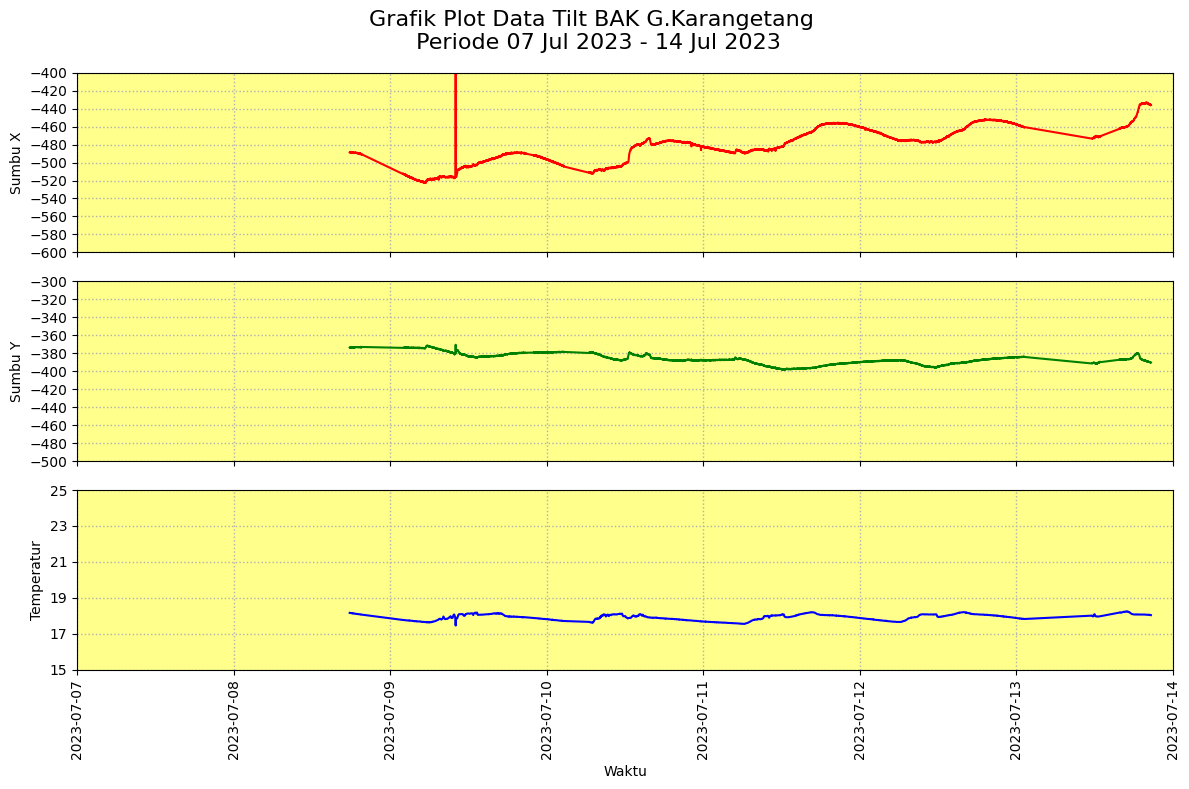

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Fungsi untuk membaca file csv dan menggabungkan kolom tanggal dan waktu
def read_data(filename):
    df = pd.read_csv(filename, sep=' ', header=None, names=['Tanggal', 'Waktu', 'Sumbu X', 'Sumbu Y', 'Temperatur', 'Temp2'])
    df['DateTime'] = pd.to_datetime(df['Tanggal'] + ' ' + df['Waktu'], format='%d/%m/%y %H:%M:%S')
    return df[['DateTime', 'Sumbu X', 'Sumbu Y', 'Temperatur']]

# Fungsi untuk membuat grafik plot
def create_plots(df, start_date, end_date, range_temp, range_sumbuX, range_sumbuY, axis_interval_sumbuX, axis_interval_sumbuY, axis_interval_temp):

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    # Grafik 1: Nilai sumbu X
    ax1.plot(df['DateTime'], df['Sumbu X'], color='red')
    ax1.set_ylabel('Sumbu X')
    ax1.set_ylim(range_sumbuX[0], range_sumbuX[1])
    ax1.yaxis.set_ticks(range(range_sumbuX[0], range_sumbuX[1] + 1, axis_interval_sumbuX))
    ax1.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax1.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 2: Nilai sumbu Y
    ax2.plot(df['DateTime'], df['Sumbu Y'], color='green')
    ax2.set_ylabel('Sumbu Y')
    ax2.set_ylim(range_sumbuY[0], range_sumbuY[1])
    ax2.yaxis.set_ticks(range(range_sumbuY[0], range_sumbuY[1] + 1, axis_interval_sumbuY))
    ax2.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax2.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 3: Nilai Suhu
    ax3.plot(df['DateTime'], df['Temperatur'], color='blue')
    ax3.set_ylabel('Temperatur')
    ax3.set_ylim(range_temp[0], range_temp[1])
    ax3.yaxis.set_ticks(range(range_temp[0], range_temp[1] + 1, axis_interval_temp))
    ax3.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax3.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Input rentang tanggal waktu

    days = mdates.DayLocator(interval=1)
    ax3.xaxis.set_major_locator(days)
    plt.xticks(rotation=90)

    # Format sumbu x menjadi "dd/mm/yyyy"
    # date_formatter = DateFormatter('%d/%m/%Y')
    # ax3.xaxis.set_major_formatter(date_formatter)
    ax3.set_xlim(start_date, end_date)
    plt.xlabel('Waktu')

    title = 'Grafik Plot Data Tilt BAK G.Karangetang \n Periode {} - {}'.format(start_date.strftime('%d %b %Y'), end_date.strftime('%d %b %Y'))
    plt.suptitle(title, fontsize=16)

    def normal(start, end):
        ax1.axvspan(start, end, facecolor='green', alpha=0.35)
        ax2.axvspan(start, end, facecolor='green', alpha=0.35)
        ax3.axvspan(start, end, facecolor='green', alpha=0.35)

    def waspada(start, end):
        ax1.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax2.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax3.axvspan(start, end, facecolor='yellow', alpha=0.45)

    def siaga(start, end):
        ax1.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax2.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax3.axvspan(start, end, facecolor='orange', alpha=0.5)

    def awas(start, end):
        ax1.axvspan(start, end, facecolor='red', alpha=0.55)
        ax2.axvspan(start, end, facecolor='red', alpha=0.55)
        ax3.axvspan(start, end, facecolor='red', alpha=0.55)

    # Memberi warna background sesuai status
    normal(pd.to_datetime('01/07/2023', format='%d/%m/%Y'), pd.to_datetime('7/07/2023', format='%d/%m/%Y'))
    waspada(pd.to_datetime('07/07/2023', format='%d/%m/%Y'), pd.to_datetime('14/07/2023', format='%d/%m/%Y'))
    siaga(pd.to_datetime('14/07/2023', format='%d/%m/%Y'), pd.to_datetime('21/07/2023', format='%d/%m/%Y'))
    awas(pd.to_datetime('21/07/2023', format='%d/%m/%Y'), pd.to_datetime('31/07/2023', format='%d/%m/%Y'))

    plt.tight_layout()
    plt.savefig('Tilt_BAK_' + end_date.strftime("%Y-%m-%d") + '.png')
    plt.show()

# Program utama
filename = 'Tilt_BAK.csv'  # Ubah sesuai dengan lokasi file
df = read_data(filename)

# Awal dan akhir plot
start_date = pd.to_datetime('07/07/2023', format='%d/%m/%Y')
end_date = pd.to_datetime('14/07/2023', format='%d/%m/%Y')

# Input rentang dan interval pada sumbu y
range_temp = (15, 25)
axis_interval_temp = 2
range_sumbuX = (-600, -400)
axis_interval_sumbuX = 20

range_sumbuY = (-500, -300)
axis_interval_sumbuY = 20


create_plots(df, start_date, end_date, range_temp, range_sumbuX, range_sumbuY, axis_interval_sumbuX, axis_interval_sumbuY, axis_interval_temp)

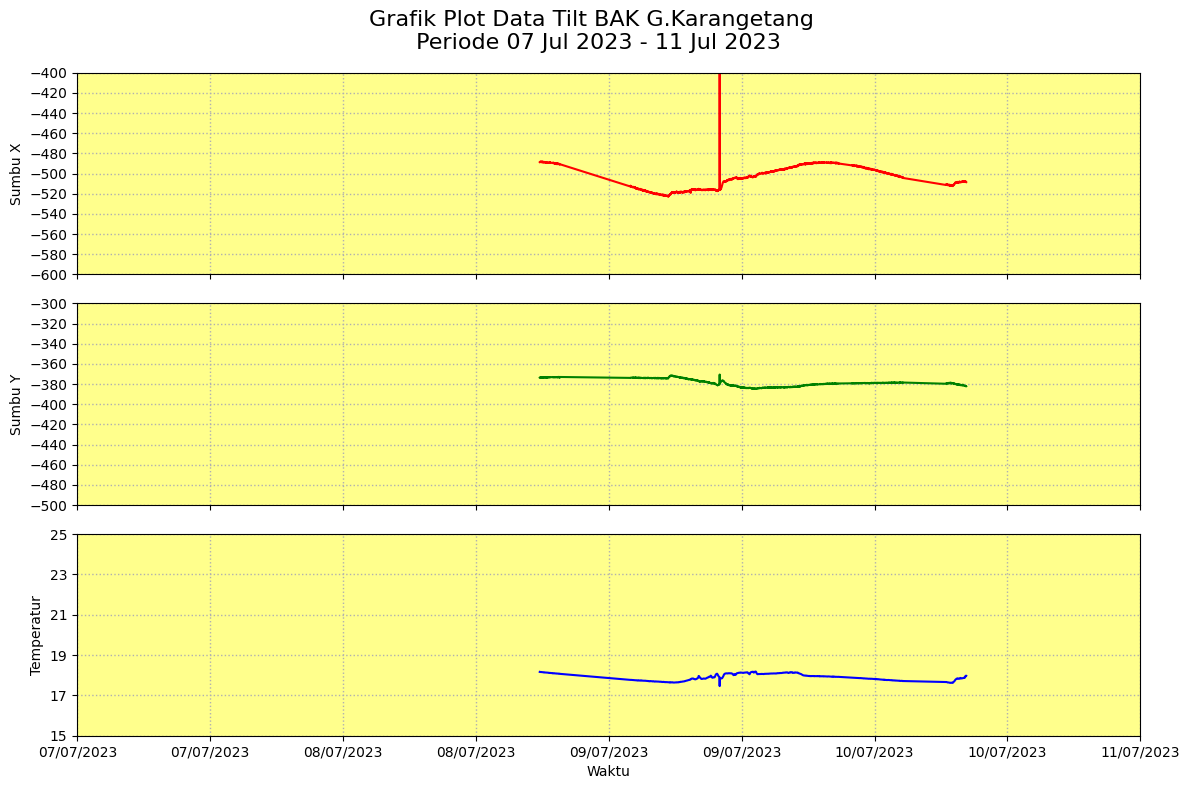

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
from datetime import datetime

# Fungsi untuk membaca file csv dan menggabungkan kolom tanggal dan waktu
def read_data(filename):
    df = pd.read_csv(filename, sep=' ', header=None, names=['Tanggal', 'Waktu', 'Sumbu X', 'Sumbu Y', 'Temperatur', 'Temp2'])
    df['DateTime'] = pd.to_datetime(df['Tanggal'] + ' ' + df['Waktu'], format='%d/%m/%y %H:%M:%S')
    return df[['DateTime', 'Sumbu X', 'Sumbu Y', 'Temperatur']]

# Fungsi untuk membuat grafik plot
def create_plots(df, start_date, end_date, range_temp, range_sumbuX, range_sumbuY, axis_interval_sumbuX, axis_interval_sumbuY, axis_interval_temp):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    # Grafik 1: Nilai sumbu X
    ax1.plot(df['DateTime'], df['Sumbu X'], color='red')
    ax1.set_ylabel('Sumbu X')
    ax1.set_ylim(range_sumbuX[0], range_sumbuX[1])
    ax1.yaxis.set_ticks(range(range_sumbuX[0], range_sumbuX[1] + 1, axis_interval_sumbuX))
    ax1.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax1.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 2: Nilai sumbu Y
    ax2.plot(df['DateTime'], df['Sumbu Y'], color='green')
    ax2.set_ylabel('Sumbu Y')
    ax2.set_ylim(range_sumbuY[0], range_sumbuY[1])
    ax2.yaxis.set_ticks(range(range_sumbuY[0], range_sumbuY[1] + 1, axis_interval_sumbuY))
    ax2.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax2.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 3: Nilai Suhu
    ax3.plot(df['DateTime'], df['Temperatur'], color='blue')
    ax3.set_ylabel('Temperatur')
    ax3.set_ylim(range_temp[0], range_temp[1])
    ax3.yaxis.set_ticks(range(range_temp[0], range_temp[1] + 1, axis_interval_temp))
    ax3.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax3.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Format sumbu x menjadi "dd/mm/yyyy"
    date_formatter = DateFormatter('%d/%m/%Y')
    ax3.xaxis.set_major_formatter(date_formatter)
    ax3.set_xlim(date2num(start_date), date2num(end_date))
    plt.xlabel('Waktu')

    title = 'Grafik Plot Data Tilt BAK G.Karangetang \n Periode {} - {}'.format(start_date.strftime('%d %b %Y'), end_date.strftime('%d %b %Y'))
    plt.suptitle(title, fontsize=16)

    def normal(start, end):
        ax1.axvspan(date2num(start), date2num(end), facecolor='green', alpha=0.35)
        ax2.axvspan(date2num(start), date2num(end), facecolor='green', alpha=0.35)
        ax3.axvspan(date2num(start), date2num(end), facecolor='green', alpha=0.35)

    def waspada(start, end):
        ax1.axvspan(date2num(start), date2num(end), facecolor='yellow', alpha=0.45)
        ax2.axvspan(date2num(start), date2num(end), facecolor='yellow', alpha=0.45)
        ax3.axvspan(date2num(start), date2num(end), facecolor='yellow', alpha=0.45)

    def siaga(start, end):
        ax1.axvspan(date2num(start), date2num(end), facecolor='orange', alpha=0.5)
        ax2.axvspan(date2num(start), date2num(end), facecolor='orange', alpha=0.5)
        ax3.axvspan(date2num(start), date2num(end), facecolor='orange', alpha=0.5)

    def awas(start, end):
        ax1.axvspan(date2num(start), date2num(end), facecolor='red', alpha=0.55)
        ax2.axvspan(date2num(start), date2num(end), facecolor='red', alpha=0.55)
        ax3.axvspan(date2num(start), date2num(end), facecolor='red', alpha=0.55)

    normal(pd.to_datetime('01/07/2023', format='%d/%m/%Y'), pd.to_datetime('7/07/2023', format='%d/%m/%Y'))
    waspada(pd.to_datetime('07/07/2023', format='%d/%m/%Y'), pd.to_datetime('14/07/2023', format='%d/%m/%Y'))
    siaga(pd.to_datetime('14/07/2023', format='%d/%m/%Y'), pd.to_datetime('21/07/2023', format='%d/%m/%Y'))
    awas(pd.to_datetime('21/07/2023', format='%d/%m/%Y'), pd.to_datetime('31/07/2023', format='%d/%m/%Y'))

    plt.tight_layout()
    plt.savefig('Tilt_BAK_' + end_date.strftime("%Y-%m-%d") + '.png')
    plt.show()

# Program utama
filename = 'Tilt_V.csv'  # Ubah sesuai dengan lokasi file
df = read_data(filename)

# Input rentang dan interval pada sumbu y
range_temp = (15, 25)
range_sumbuX = (-600, -400)
range_sumbuY = (-500, -300)
axis_interval_sumbuX = 20
axis_interval_sumbuY = 20
axis_interval_temp = 2

create_plots(df, start_date, end_date, range_temp, range_sumbuX, range_sumbuY, axis_interval_sumbuX, axis_interval_sumbuY, axis_interval_temp)
